# Conjectures

In [23]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Semi-Unitary vs. Sliced Full Unitary

In [80]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 2
d = 2**n
rank = 2
spectrum_reduced_list = []
spectrum_full_list = []


for i in tqdm(range(10000)):
    kraus_reduced = KrausMap(d=d, rank=rank, generate_full=False)
    spectrum_reduced = channel_spectrum(kraus_reduced, keep_real=False)
    spectrum_reduced_list.append(spectrum_reduced)
    
    kraus_full = KrausMap(d=d, rank=rank, generate_full=True)
    spectrum_full = channel_spectrum(kraus_full, keep_real=False)
    spectrum_full_list.append(spectrum_full)

spectrum_reduced = tf.concat(spectrum_reduced_list, axis=0)
spectrum_full = tf.concat(spectrum_full_list, axis=0)


  0%|          | 0/10000 [00:00<?, ?it/s]

'\nt = np.linspace(0, 2*np.pi, 100)\ncircle = [np.sin(t), np.cos(t)]\n\nfig = plt.figure(figsize=(8,8), dpi = 300, facecolor=\'w\', edgecolor=\'k\')\nax = fig.add_subplot(111)\nax.set_aspect(1)\nplt.plot(*circle, "k")\n\n\nplt.plot(spectrum_reduced[:,0], spectrum_reduced[:,1], "bo")    \nplt.plot(spectrum_full[:,0], spectrum_full[:,1], "ro")\n    \n\nplt.show()\n'

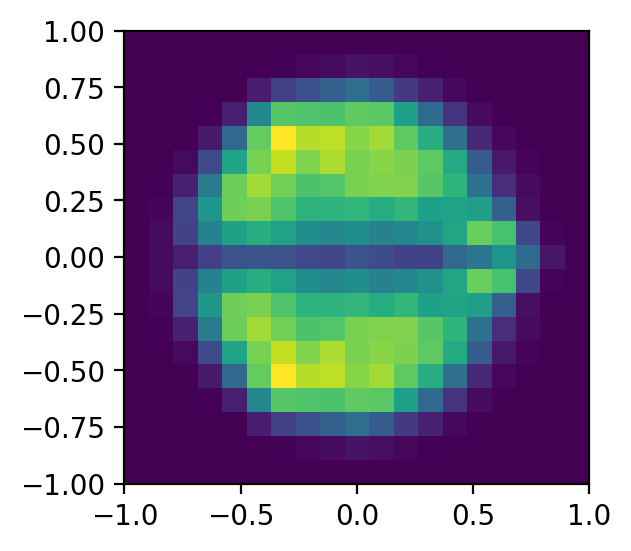

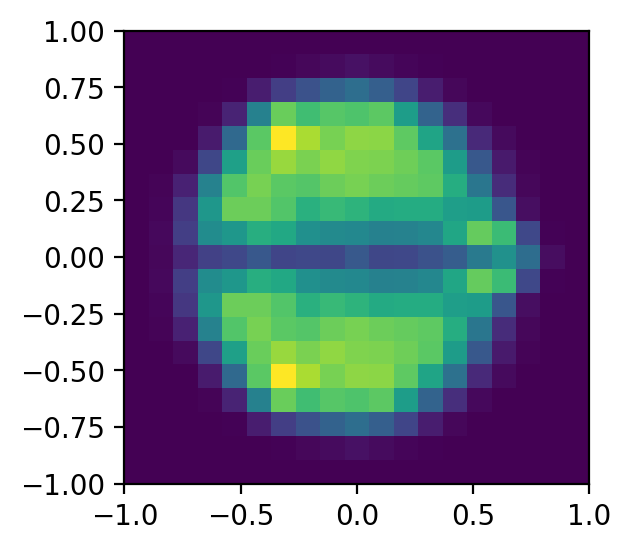

In [84]:
bins = np.linspace(-1, 1, 20)
fig = plt.figure(figsize=(3,3), dpi = 200, facecolor='w', edgecolor='k')
hist_reduced = plt.hist2d(np.real(spectrum_reduced[:,0]), np.real(spectrum_reduced[:,1]), bins=[bins,bins], density=True)
density_reduced = hist_reduced[0]/np.sum(hist_reduced[0])
plt.show()

bins = np.linspace(-1, 1, 20)
fig = plt.figure(figsize=(3,3), dpi = 200, facecolor='w', edgecolor='k')
hist_full = plt.hist2d(np.real(spectrum_full[:,0]), np.real(spectrum_full[:,1]), bins=[bins,bins], density=True)
density_full = hist_full[0]/np.sum(hist_full[0])
plt.show()

In [85]:
kl_div = np.sum(density_reduced*np.log((density_reduced+1e-32)/(density_full+1e-32)))
print(kl_div)

0.00813226595002834


In [86]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 2
d = 2**n
rank = 4
spectrum_reduced_list = []
spectrum_full_list = []


for i in tqdm(range(10000)):
    kraus_reduced = KrausMap(d=d, rank=rank, generate_full=False)
    spectrum_reduced = channel_spectrum(kraus_reduced, keep_real=False)
    spectrum_reduced_list.append(spectrum_reduced)
    
    kraus_full = KrausMap(d=d, rank=rank, generate_full=True)
    spectrum_full = channel_spectrum(kraus_full, keep_real=False)
    spectrum_full_list.append(spectrum_full)

spectrum_reduced = tf.concat(spectrum_reduced_list, axis=0)
spectrum_full = tf.concat(spectrum_full_list, axis=0)

  0%|          | 0/10000 [00:00<?, ?it/s]

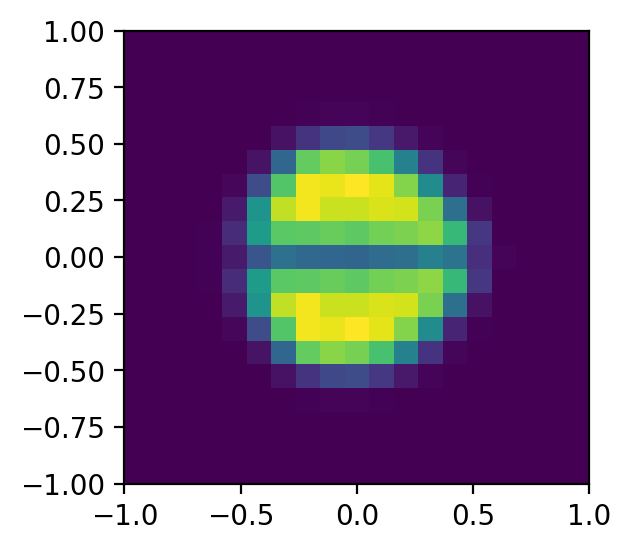

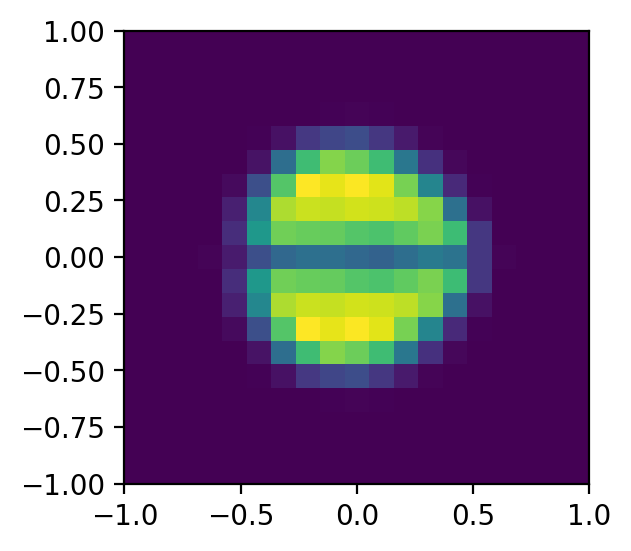

In [87]:
bins = np.linspace(-1, 1, 20)
fig = plt.figure(figsize=(3,3), dpi = 200, facecolor='w', edgecolor='k')
hist_reduced = plt.hist2d(np.real(spectrum_reduced[:,0]), np.real(spectrum_reduced[:,1]), bins=[bins,bins], density=True)
density_reduced = hist_reduced[0]/np.sum(hist_reduced[0])
plt.show()

bins = np.linspace(-1, 1, 20)
fig = plt.figure(figsize=(3,3), dpi = 200, facecolor='w', edgecolor='k')
hist_full = plt.hist2d(np.real(spectrum_full[:,0]), np.real(spectrum_full[:,1]), bins=[bins,bins], density=True)
density_full = hist_full[0]/np.sum(hist_full[0])
plt.show()

In [89]:
kl_div = np.sum(density_reduced*np.log((density_reduced+1e-32)/(density_full+1e-32)))
print(kl_div)

0.0036472739333416886


## Ensamble Fidelity Distribution

In [94]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 3
d = 2**n
rank = 4
spectrum_reduced_list = []
spectrum_full_list = []

F_reduced_list = []
F_full_list = []

for i in tqdm(range(10000)):
    kraus_reduced1 = KrausMap(d=d, rank=rank, generate_full=False)
    kraus_reduced2 = KrausMap(d=d, rank=rank, generate_full=False)
    F_reduced = channel_fidelity(kraus_reduced1, kraus_reduced2)
    F_reduced_list.append(F_reduced)
    
    kraus_full1 = KrausMap(d=d, rank=rank, generate_full=True)
    kraus_full2 = KrausMap(d=d, rank=rank, generate_full=True)
    F_full = channel_fidelity(kraus_full1, kraus_full2)
    F_full_list.append(F_full)

  0%|          | 0/10000 [00:00<?, ?it/s]

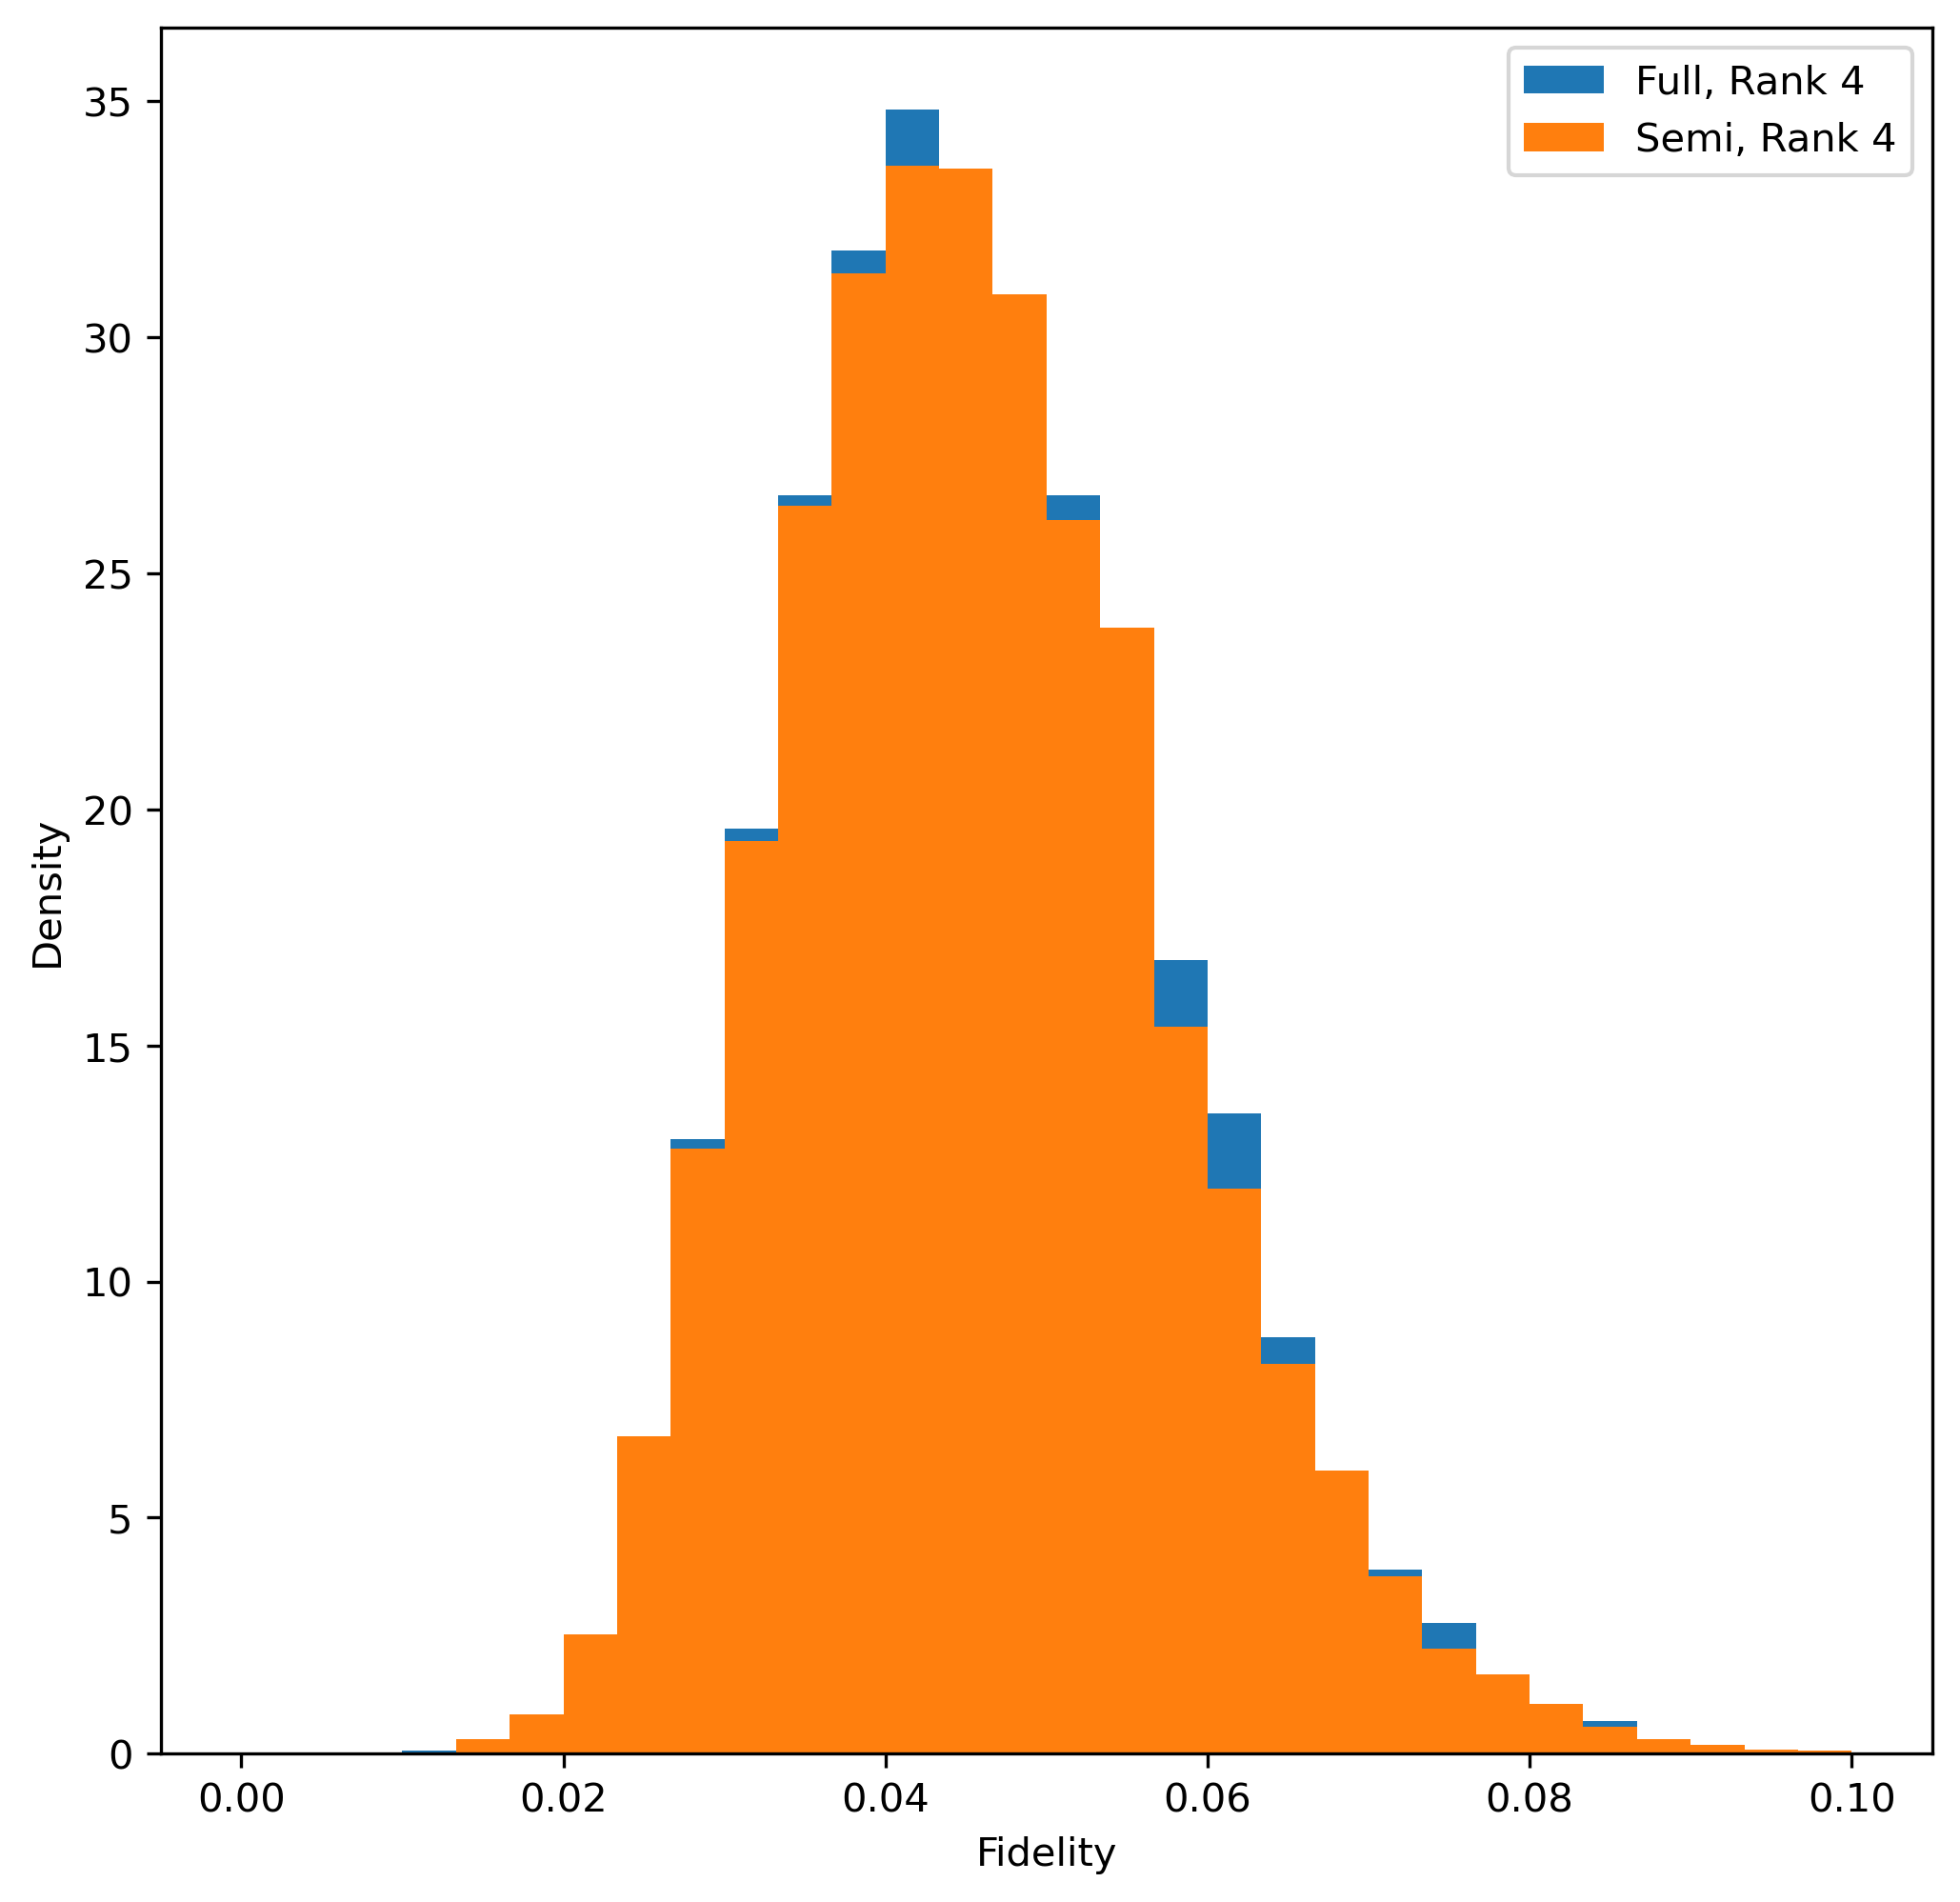

In [95]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
bins = np.linspace(0, 0.1, 31)
plt.hist(F_full_list, bins=bins, density=True)
plt.hist(F_reduced_list, bins=bins, density=True)
plt.xlabel("Fidelity")
plt.ylabel("Density")
plt.legend(["Full, Rank 4", "Semi, Rank 4"])
plt.show()

In [90]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 3
d = 2**n
rank = 8
spectrum_reduced_list = []
spectrum_full_list = []

F_reduced_list = []
F_full_list = []

for i in tqdm(range(10000)):
    kraus_reduced1 = KrausMap(d=d, rank=rank, generate_full=False)
    kraus_reduced2 = KrausMap(d=d, rank=rank, generate_full=False)
    F_reduced = channel_fidelity(kraus_reduced1, kraus_reduced2)
    F_reduced_list.append(F_reduced)
    
    kraus_full1 = KrausMap(d=d, rank=rank, generate_full=True)
    kraus_full2 = KrausMap(d=d, rank=rank, generate_full=True)
    F_full = channel_fidelity(kraus_full1, kraus_full2)
    F_full_list.append(F_full)

  0%|          | 0/10000 [00:00<?, ?it/s]

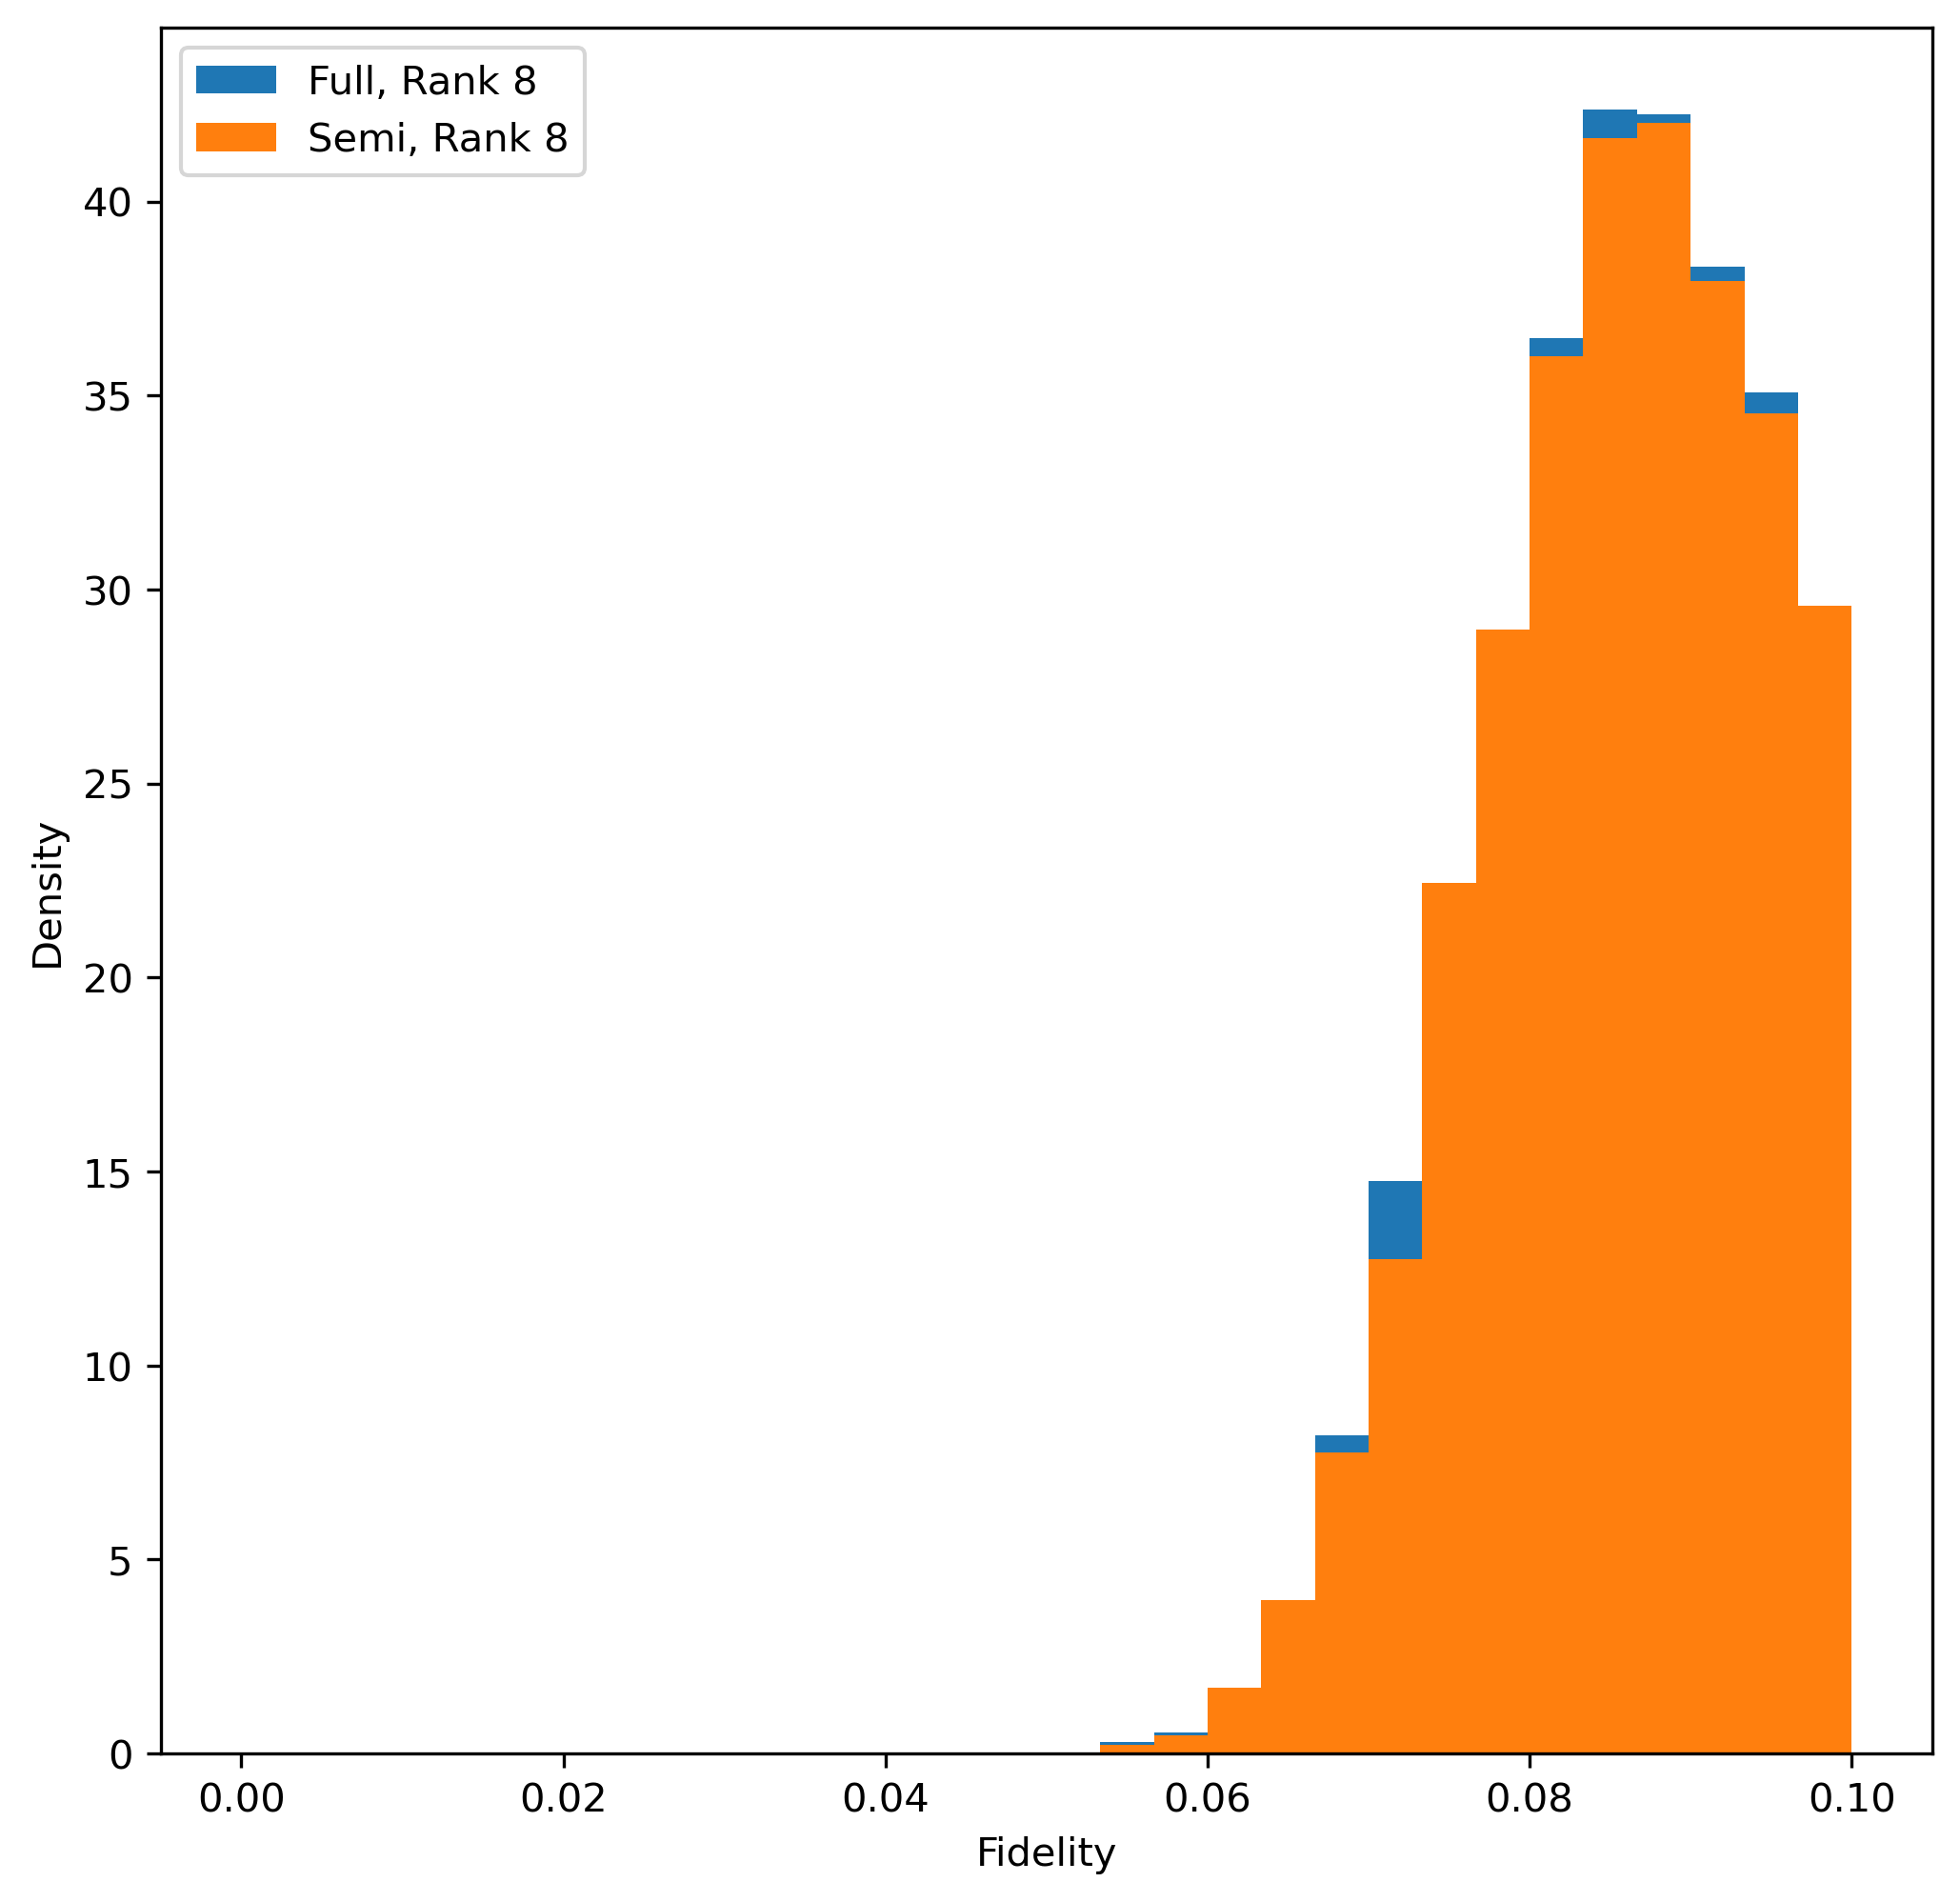

In [93]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
bins = np.linspace(0, 0.1, 31)
plt.hist(F_full_list, bins=bins, density=True)
plt.hist(F_reduced_list, bins=bins, density=True)
plt.xlabel("Fidelity")
plt.ylabel("Density")
plt.legend(["Full, Rank 8", "Semi, Rank 8"])
plt.show()